# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
np.random.seed(123)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [4]:
response_dict={"City":[],
               "Country":[],
              "Latitude":[],
               "Longitude":[],
              "Temperature":[],
              "Humidity":[],
              "Cloudiness":[],
              "Wind Speed (mph)":[]}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
url= "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

query_url=f"{url}&units={units}&appid={weather_api_key}&q="

for city in cities:
    try:
        response=requests.get(query_url + city).json()
        print(response["name"])
        response_dict["City"].append(response["name"])
        response_dict["Country"].append(response["sys"]["country"])
        response_dict["Latitude"].append(response["coord"]["lat"])
        response_dict["Longitude"].append(response["coord"]["lon"])
        response_dict["Temperature"].append(response["main"]["temp_max"])
        response_dict["Humidity"].append(response["main"]["humidity"])
        response_dict["Cloudiness"].append(response["clouds"]["all"])
        response_dict["Wind Speed (mph)"].append(response["wind"]["speed"])
    except KeyError:
        print("********City Skipped********")
        cities.remove(city)


Camacha
Mataura
Hobart
Manacor
São José da Coroa Grande
Barrow
Levelland
Ambon City
Morondava
Rikitea
Ogden
Alta Floresta
Port Alfred
Ongandjera
Arrondissement de Bastia
New Norfolk
Mabay
Ugoofaaru
Ponta do Sol
Severo-Kuril'sk
Kapaa
Horasan
Esperance
Taltal
Dunedin


KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_response_df=pd.DataFrame(response_dict)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humid_cities=weather_response_df.loc[weather_response_df["Humidity"]>100]
humid_cities.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed (mph)


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_response_df.to_csv("../WeatherPy/cities.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

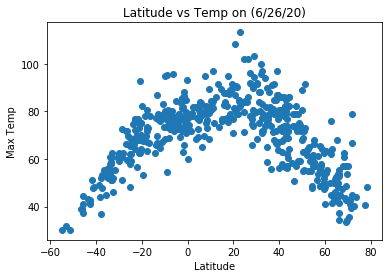

In [39]:
temp=weather_response_df["Temperature"]
latitude=weather_response_df["Latitude"]
plt.scatter(latitude, temp)
plt.title("Latitude vs Temp on (6/26/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("hemisphere_plots.png")


## Latitude vs. Humidity Plot

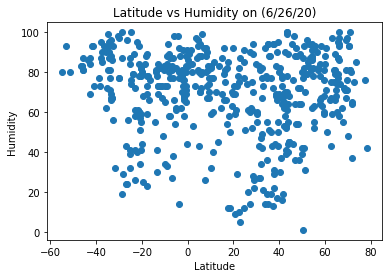

In [41]:
humidity=weather_response_df["Humidity"]
plt.scatter(latitude, humidity)
plt.title("Latitude vs Humidity on (6/26/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("hemisphere_plot.png")


## Latitude vs. Cloudiness Plot

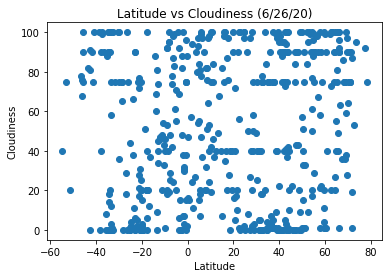

In [42]:
cloud=weather_response_df["Cloudiness"]
plt.scatter(latitude, cloud)
plt.title("Latitude vs Cloudiness (6/26/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Hemisphere_Plots/lat_vs_cloud.png")


## Latitude vs. Wind Speed Plot

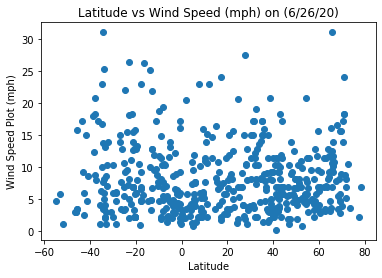

In [43]:
wind=weather_response_df["Wind Speed (mph)"]
plt.scatter(latitude, wind)
plt.title("Latitude vs Wind Speed (mph) on (6/26/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed Plot (mph)")
plt.savefig("Hemisphere_Plots/lat_vs_wind.png")


## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_df=weather_response_df.loc[weather_response_df["Latitude"]>0, :]

southern_df=weather_response_df.loc[weather_response_df["Latitude"]<0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

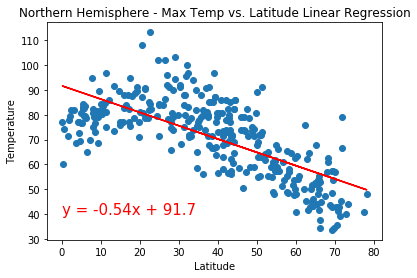

In [44]:
north_temp=northern_df["Temperature"]
north_lat=northern_df["Latitude"]
ntemp_slope, ntemp_int, ntemp_r, ntemp_p, ntemp_std_err = linregress(north_lat, north_temp)

ntemp_fit= ntemp_slope * north_lat + ntemp_int
ntemp_line_eq = "y = " + str(round(ntemp_slope,2)) + "x + " + str(round(ntemp_int,2))


plt.scatter(north_lat, north_temp)
plt.plot(north_lat, ntemp_fit, "red")
plt.annotate(ntemp_line_eq,(0,40), fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.savefig("Hemisphere_Plots/north_vs_temp.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

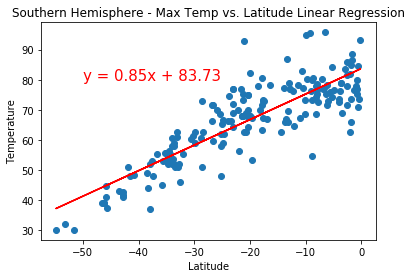

In [45]:
south_temp=southern_df["Temperature"]
south_lat=southern_df["Latitude"]
stemp_slope, stemp_int, stemp_r, stemp_p, stemp_std_err = linregress(south_lat, south_temp)

stemp_fit= stemp_slope * south_lat + stemp_int
stemp_line_eq = "y = " + str(round(stemp_slope,2)) + "x + " + str(round(stemp_int,2))


plt.scatter(south_lat, south_temp)
plt.plot(south_lat, stemp_fit, "red")
plt.annotate(stemp_line_eq,(-50,80), fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.savefig("Hemisphere_Plots/south_vs_temp.png")


Analysis: The further south you travel from the equator the faster temperature falls, the inverse is true for the Northern hemisphere but the rate of change is not as dramatic.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

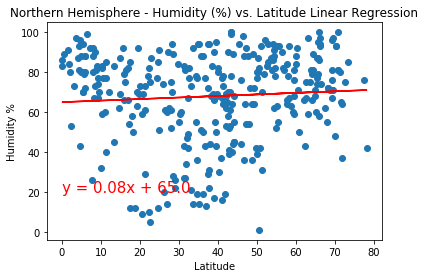

In [46]:
north_humidity=northern_df["Humidity"]
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(north_lat, north_humidity)

nh_fit= nh_slope * north_lat + nh_int
nh_line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))

plt.scatter(north_lat, north_humidity)
plt.plot(north_lat, nh_fit, "red")
plt.annotate(nh_line_eq,(0,20), fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.savefig("Hemisphere_Plots/north_vs_humidity.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

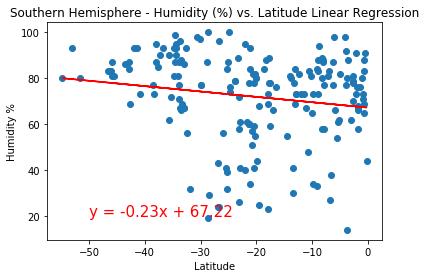

In [47]:
south_humidity=southern_df["Humidity"]
sh_slope, sh_int, sh_r, sh_p, sh_std_err = linregress(south_lat, south_humidity)

sh_fit= sh_slope * south_lat + sh_int
sh_line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))

plt.scatter(south_lat, south_humidity)
plt.plot(south_lat, sh_fit, "red")
plt.annotate(sh_line_eq,(-50,20), fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.savefig("Hemisphere_Plots/south_vs_humidity.png")


Analysis: When traveling from the equator the Southern hemisphere becomes humid at a faster rate than the Northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

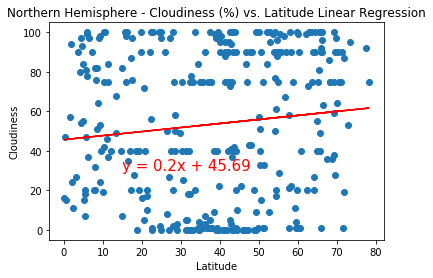

In [48]:
north_cloud=northern_df["Cloudiness"]
nc_slope, nc_int, nc_r, nc_p, nc_std_err = linregress(north_lat, north_cloud)

nc_fit= nc_slope * north_lat + nc_int
nc_line_eq = "y = " + str(round(nc_slope,2)) + "x + " + str(round(nc_int,2))

plt.scatter(north_lat, north_cloud)
plt.plot(north_lat, nc_fit, "red")
plt.annotate(nc_line_eq,(15,30), fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("Hemisphere_Plots/north_vs_cloud.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

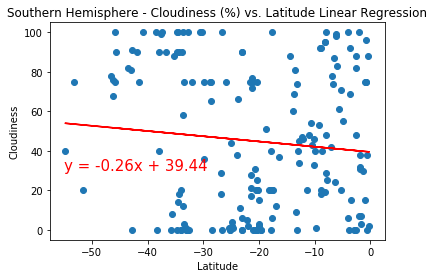

In [49]:
south_cloud=southern_df["Cloudiness"]
sc_slope, sc_int, sc_r, sc_p, sc_std_err = linregress(south_lat, south_cloud)

sc_fit= sc_slope * south_lat + sc_int
sc_line_eq = "y = " + str(round(sc_slope,2)) + "x + " + str(round(sc_int,2))

plt.scatter(south_lat, south_cloud)
plt.plot(south_lat, sc_fit, "red")
plt.annotate(sc_line_eq,(-55,30), fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("Hemisphere_Plots/south_vs_cloud.png")


Analysis: The Northen hemisphere averages slightly higher chance of Cloudiness, but the relationship to the equator is equally progressive.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

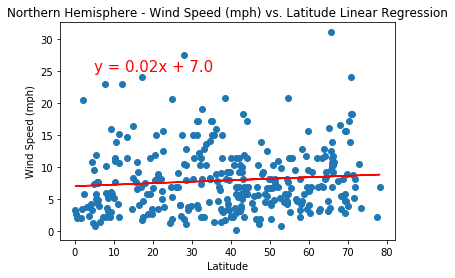

In [50]:
north_wind=northern_df["Wind Speed (mph)"]
nw_slope, nw_int, nw_r, nw_p, nw_std_err = linregress(north_lat, north_wind)

nw_fit= nw_slope * north_lat + nw_int
nw_line_eq = "y = " + str(round(nw_slope,2)) + "x + " + str(round(nw_int,2))

plt.scatter(north_lat, north_wind)
plt.plot(north_lat, nw_fit, "red")
plt.annotate(nw_line_eq,(5,25), fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Hemisphere_Plots/north_vs_wind.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

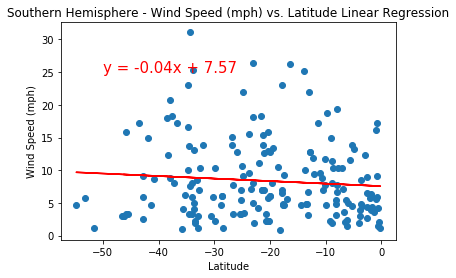

In [51]:
south_wind=southern_df["Wind Speed (mph)"]
sw_slope, sw_int, sw_r, sw_p, sw_std_err = linregress(south_lat, south_wind)

sw_fit= sw_slope * south_lat + sw_int
sw_line_eq = "y = " + str(round(sw_slope,2)) + "x + " + str(round(sw_int,2))

plt.scatter(south_lat, south_wind)
plt.plot(south_lat, sw_fit, "red")
plt.annotate(sw_line_eq,(-50,25), fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Hemisphere_Plots/south_vs_wind.png")


Analysis: The Wind Speed in both hemispheres is almost an exact inverse, the Southern is a slight higher rate of increase the further south you travel.